In [1]:
# importação das bibliotecas
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_edu = pd.read_csv('/home/amador/dados/xAPI-Edu-Data.csv')

In [3]:
df_edu.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


In [4]:
# verificando as distribuições de classes (mpedia, alta e baixa)
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [5]:
# verificando os registros nulos
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [6]:
# codificando atributos numéricos
# obs.: Numa base de dados real, também deve ser testado com one hot encoding
Features = df_edu # instanciando o df
# criando uma variável e percorrendo os dtypes, selecionandos o que for object
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
# para cada coluna categórica
for col in Cat_Colums:
# aplica o label encoder
    label = LabelEncoder()
# transforma os dados
    Features[col] = label.fit_transform(Features[col])

In [7]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


### Machine Learning

In [8]:
# dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_edu.drop('Class',1),df_edu['Class'],test_size=0.3,random_state=0)

In [9]:
# verificando a forma dos dados de X
X_train.shape,X_test.shape

((336, 16), (144, 16))

In [10]:
# verificando a forma dos dados de y
y_train.shape,y_test.shape

((336,), (144,))

In [11]:
# instanciando o classificador
random_clf = RandomForestClassifier()

In [12]:
# treinando o random forest
random_clf.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
# predizendo as classes a partir do modelo treinado utilizando o conjunto de teste
resultado = random_clf.predict(X_test)
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

### Validação

In [14]:
# métricas de validação
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        39
           1       0.80      0.94      0.86        34
           2       0.79      0.76      0.78        71

    accuracy                           0.78       144
   macro avg       0.78      0.80      0.79       144
weighted avg       0.78      0.78      0.78       144



In [15]:
# verificando as features mais importantes para o modelo treinado
random_clf.feature_importances_

array([0.02107051, 0.03490076, 0.03531641, 0.0166454 , 0.03166513,
       0.02177042, 0.04694831, 0.01188545, 0.0421251 , 0.16211819,
       0.17565272, 0.12288245, 0.08802457, 0.03903396, 0.0255213 ,
       0.1244393 ])

In [16]:
# listando como uma series pandas as features importantes
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

VisITedResources            0.175653
raisedhands                 0.162118
StudentAbsenceDays          0.124439
AnnouncementsView           0.122882
Discussion                  0.088025
Topic                       0.046948
Relation                    0.042125
ParentAnsweringSurvey       0.039034
PlaceofBirth                0.035316
NationalITy                 0.034901
GradeID                     0.031665
ParentschoolSatisfaction    0.025521
SectionID                   0.021770
gender                      0.021071
StageID                     0.016645
Semester                    0.011885
dtype: float64

### Features mais importantes (graficamente)

In [17]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

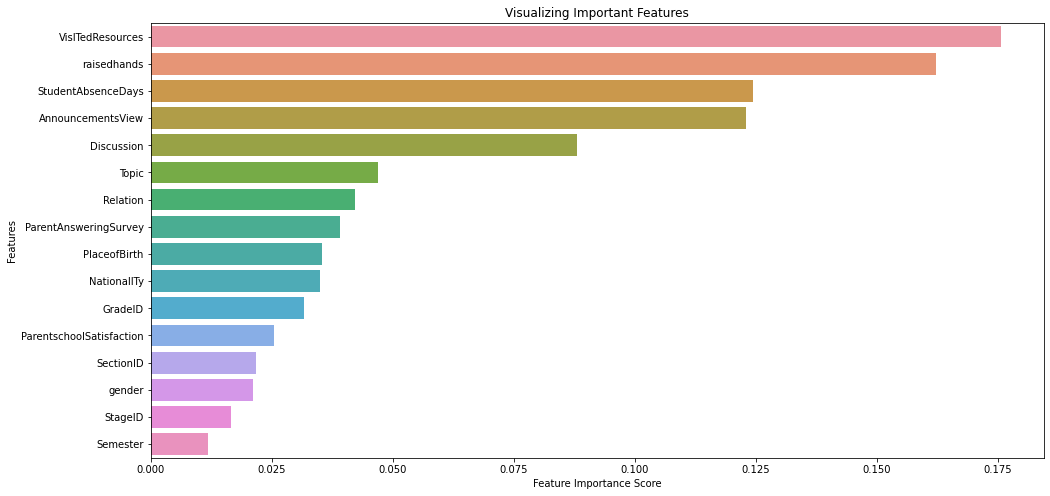

In [18]:
visualiza_features_importantes(feature_imp)

In [19]:
# selecionando as features mais importantes
features_selecionadas = []
for feature,importancia in feature_imp.iteritems(): # iteritems para iterar sobre cada item da serie
    if importancia > 0.03:
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

VisITedResources:	0.17565272373683197
raisedhands:	0.1621181921909241
StudentAbsenceDays:	0.12443930433347508
AnnouncementsView:	0.12288245146792366
Discussion:	0.08802457419460523
Topic:	0.04694831159644398
Relation:	0.04212509700596527
ParentAnsweringSurvey:	0.03903395571466294
PlaceofBirth:	0.03531641452653516
NationalITy:	0.03490076384746562
GradeID:	0.03166512846658928


In [20]:
features_selecionadas

['VisITedResources',
 'raisedhands',
 'StudentAbsenceDays',
 'AnnouncementsView',
 'Discussion',
 'Topic',
 'Relation',
 'ParentAnsweringSurvey',
 'PlaceofBirth',
 'NationalITy',
 'GradeID']

### Machine Learning novamente

In [21]:
# Separando os dados em treino e teste utilizando apenas as features selecionadas
X_train, X_test, y_train, y_test = train_test_split(
    df_edu[features_selecionadas],
    df_edu['Class'],
    test_size=0.3,
    random_state=0
)

In [22]:
# novas forma dos dados em X e y
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((336, 11), (144, 11), (336,), (144,))

In [23]:
# instanciando o classificador
random_clf = RandomForestClassifier(random_state=0)
# Treinando novamente o modelo Random Forest
random_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [24]:
# executando o altoritmo
resultado = random_clf.predict(X_test)
resultado

array([2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

### Validação novamente

In [26]:
# métricas de validação
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68        39
           1       0.80      0.97      0.88        34
           2       0.79      0.69      0.74        71

    accuracy                           0.76       144
   macro avg       0.75      0.78      0.76       144
weighted avg       0.76      0.76      0.75       144



### Explorando as árvores geradas pelo Random Forest

* Apenas para fins didáticos, por isso a exploração em baixo nível

In [27]:
# random_clf é o próprio clf -> RandomForestClassifier(random_state=0)
# aqui estão sendo explorados seus atributos internos
print("Número de árvores da floresta: {}".format(len(random_clf.estimators_))) 
print("Árvores floresta gerada:")
for tree in random_clf.estimators_: # cada estimator são os atributos de uma árvore
    print("\nNumero de nós: {}".format(tree.tree_.node_count)) # contagem de nós
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth)) # profundidade
    print("Features importantes: {}".format(tree.feature_importances_)) # features importantes
    print("\nObjeto: {}".format(tree)) #  árvore de decisão

Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 117
Profundidade da árvore: 12
Features importantes: [0.20149192 0.1653399  0.24943917 0.05578993 0.03724401 0.04049227
 0.06110799 0.04037578 0.05746851 0.05666205 0.03458847]

Objeto: DecisionTreeClassifier(max_features='auto', random_state=209652396)

Numero de nós: 147
Profundidade da árvore: 15
Features importantes: [0.08964893 0.14735866 0.22964021 0.13438454 0.06302946 0.07239185
 0.02891149 0.10337816 0.03623637 0.03215745 0.06286288]

Objeto: DecisionTreeClassifier(max_features='auto', random_state=398764591)

Numero de nós: 139
Profundidade da árvore: 12
Features importantes: [0.14483883 0.16536106 0.13926858 0.16911452 0.12960927 0.06198492
 0.11706731 0.00677251 0.0106626  0.04707969 0.0082407 ]

Objeto: DecisionTreeClassifier(max_features='auto', random_state=924231285)

Numero de nós: 121
Profundidade da árvore: 12
Features importantes: [0.15056972 0.18735413 0.14885312 0.1821619  0.11461093 0.053

In [28]:
# selecionando uma das árvores
tree0 = random_clf.estimators_[0]

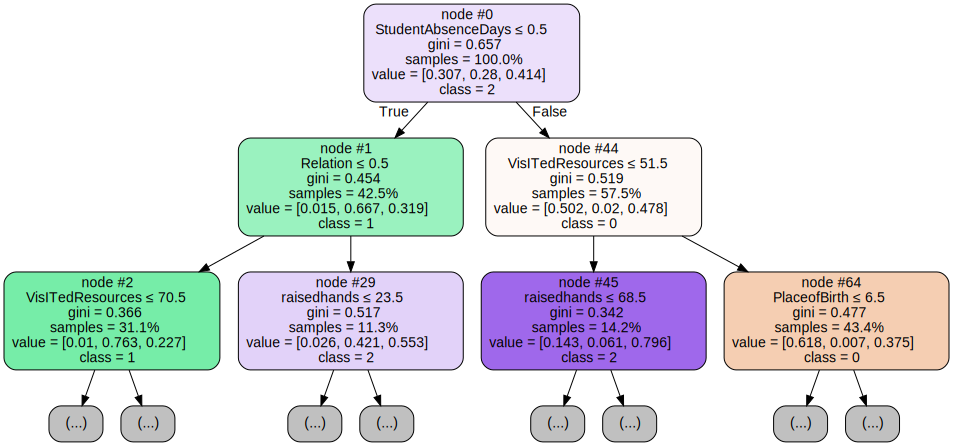

In [29]:
# visualizando graficamente
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=2,# a limitação é somente para a visualização
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

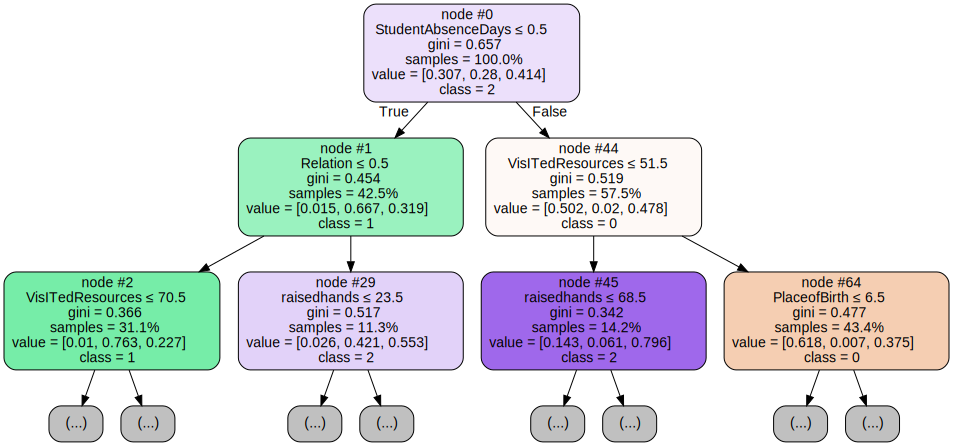

In [30]:
tree1 = random_clf.estimators_[1]
# visualizando graficamente
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=2,# a limitação é somente para a visualização
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph